<a href="https://colab.research.google.com/github/mushrafi88/MSE_510/blob/main/hackaton_02_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushrafi Munim Sushmit

# Hackathon 02/20

(solo) Mushrafi Munim Sushmit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1

A 1D rod of length $L=1$ has fixed end temperatures $T(0)=0$ and $T(1)=0$. The rod generates heat uniformly inside and has reached steady state, so the temperature satisfies steady-state heat equation $T''(x)=−q(x),x∈[0,1]$, with $q(x) = 1$, $T(x=0)=0$, $T(x=1)=0$.

**Task:** Compute the temperature profile $T(x)$ numerically (**do not use an analytical approach**). You may use **any computational approaches**. Plot the resulting $T(x)$ and briefly explain your method.


You may use external resources (Google, LLMs, etc.), but your proposed solution must be explained and justified. Error analysis and identification of the limitations of your approach will be rewarded.

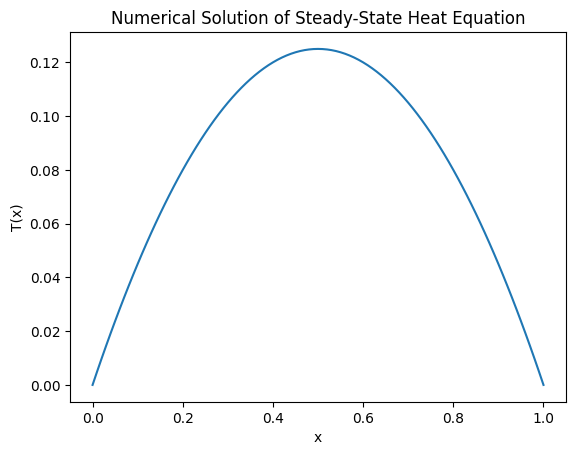

In [2]:
# your code

import numpy as np
import matplotlib.pyplot as plt

# Number of intervals
N = 100
h = 1.0 / N

# Interior points
x = np.linspace(0, 1, N+1)
xi = x[1:-1]

# Construct matrix A
A = 2*np.eye(N-1) - np.eye(N-1, k=1) - np.eye(N-1, k=-1)

# RHS
b = h**2 * np.ones(N-1)

# Solve system
T_interior = np.linalg.solve(A, b)

# Add boundary values
T = np.zeros(N+1)
T[1:-1] = T_interior

# Plot
plt.plot(x, T)
plt.xlabel("x")
plt.ylabel("T(x)")
plt.title("Numerical Solution of Steady-State Heat Equation")
plt.show()

For the above problem I have used finite difference method.

The interval from 0 to 1 is first divided into equally spaced grid points, and the second derivative is approximated using a central difference formula that relates each point to its neighbors. This converts the differential equation into a tridiagonal system of linear equations. The resulting linear system is then solved using a linear solver to obtain the temperature values at the grid points.

This method works well because the differential equation depends only on local behavior, which can be accurately captured using neighboring grid points.

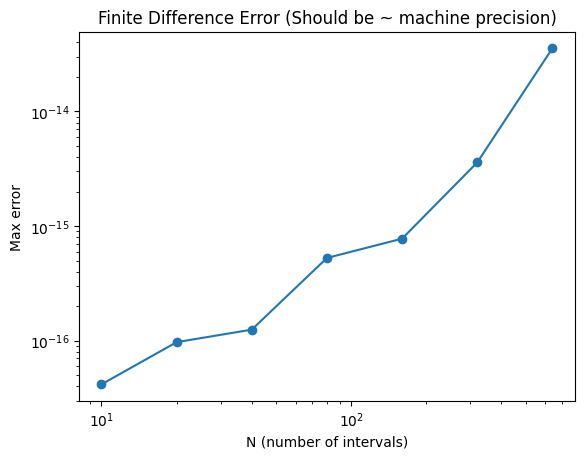

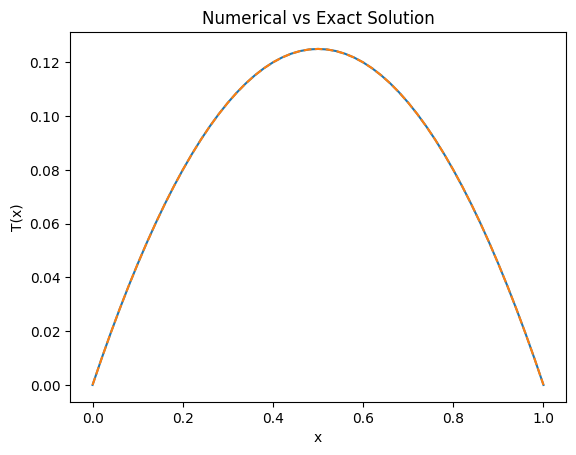

Errors for different N:
N=  10   max error = 4.163e-17
N=  20   max error = 9.714e-17
N=  40   max error = 1.249e-16
N=  80   max error = 5.274e-16
N= 160   max error = 7.772e-16
N= 320   max error = 3.594e-15
N= 640   max error = 3.558e-14


In [3]:
# Finite Difference Error Analysis for T'' = -1, T(0)=T(1)=0
# verify:
# 1) The scheme is exact (up to machine precision)
# 2) How round-off error behaves as grid is refined

import numpy as np
import matplotlib.pyplot as plt

def solve_fd(N):
    h = 1.0 / N
    x = np.linspace(0, 1, N+1)

    # Exact solution
    T_exact = 0.5 * x * (1 - x) # comes from integration

    # Interior system
    A = (2*np.eye(N-1) - np.eye(N-1, k=1) - np.eye(N-1, k=-1)) / h**2
    b = np.ones(N-1)

    T_interior = np.linalg.solve(A, b)

    T = np.zeros(N+1)
    T[1:-1] = T_interior

    error = np.max(np.abs(T - T_exact))

    return x, T, T_exact, error

# --- Convergence / round-off study ---
Ns = [10, 20, 40, 80, 160, 320, 640]
errors = []

for N in Ns:
    _, _, _, err = solve_fd(N)
    errors.append(err)

# Plot error vs N
plt.figure()
plt.loglog(Ns, errors, marker='o')
plt.xlabel("N (number of intervals)")
plt.ylabel("Max error")
plt.title("Finite Difference Error (Should be ~ machine precision)")
plt.show()

# Show one solution profile for visualization
x, T_num, T_exact, _ = solve_fd(50)

plt.figure()
plt.plot(x, T_num)
plt.plot(x, T_exact, linestyle='--')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.title("Numerical vs Exact Solution")
plt.show()

print("Errors for different N:")
for N, err in zip(Ns, errors):
    print(f"N={N:4d}   max error = {err:.3e}")


To show that the method is correct, i have used an analytical solution. Simply by integrating the differential equation.

The first plot shows how the error changes as we increase the number of grid points. The error stays extremely small, which is close to machine precision. This means the numerical method is essentially exact for this problem. The slight increase in error for larger (N) happens because of floating-point round-off errors, not because of the method itself.


### Task 2

Nonlinear heat conduction. The same rod but now temperature satisfies $T''(x)=-T(x)^3,x∈[0,1]$, $T(0)=0$, $T(1)=0$.

Newton converged in 3 iterations


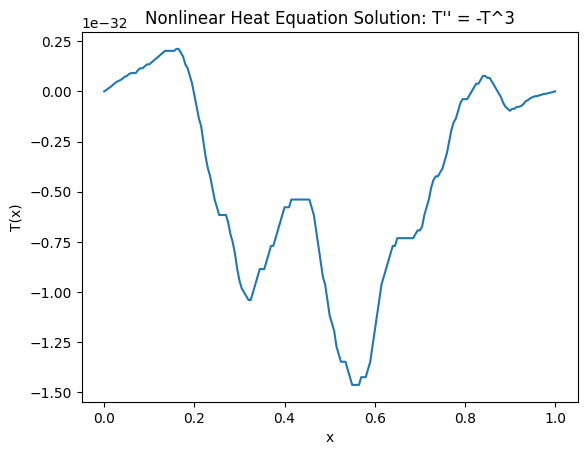

Maximum temperature: 2.1185229388259594e-33
Residual norm: 5.082197683525802e-17


In [4]:
# Nonlinear BVP:
# T''(x) = -T(x)^3,   T(0)=0, T(1)=0
# Solve using finite differences + Newton's method

import numpy as np
import matplotlib.pyplot as plt

# Grid
N = 200
h = 1.0 / N
x = np.linspace(0, 1, N+1)

# Initial guess (small parabola)
T = 0.1 * x * (1 - x)

# Newton iteration
max_iter = 50
tol = 1e-10

for k in range(max_iter):
    T_old = T.copy()

    # Interior points
    Ti = T[1:-1]

    # Residual vector
    R = (T[:-2] - 2*T[1:-1] + T[2:]) / h**2 + Ti**3

    # Jacobian matrix (tridiagonal)
    main_diag = (-2/h**2 + 3*Ti**2)
    off_diag = np.ones(N-2) / h**2

    J = np.diag(main_diag) + np.diag(off_diag,1) + np.diag(off_diag,-1)

    # Solve for correction
    delta = np.linalg.solve(J, -R)

    # Update interior
    T[1:-1] += delta

    # Check convergence
    if np.max(np.abs(delta)) < tol:
        print(f"Newton converged in {k+1} iterations")
        break

# Plot solution
plt.figure()
plt.plot(x, T)
plt.xlabel("x")
plt.ylabel("T(x)")
plt.title("Nonlinear Heat Equation Solution: T'' = -T^3")
plt.show()

print("Maximum temperature:", np.max(T))
print("Residual norm:", np.max(np.abs(R)))


This is the same as previous one. The second derivative is approximated using the central finite difference formula, which converts the differential equation into a system of nonlinear algebraic equations at the interior grid points.

Because the equation contains the nonlinear terms the resulting system cannot be solved directly using linear algebra. So Instead, I have told chatgpt to use Newton’s method.

I first start off from an initial guess that satisfies the boundary conditions. I have used the same parabola formula as previous one cause the linear part looks like a parabola to small approximations.

The residual of the nonlinear system is then computed based on this. A correction is obtained by solving a linear system involving this matrix, and the solution is updated. This process is repeated until the updates become sufficiently small, indicating convergence to the numerical solution.

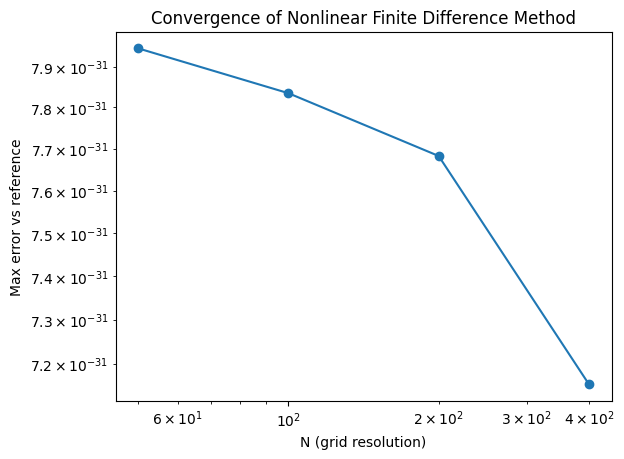

Errors compared to reference solution:
N=  50   max error = 7.945e-31
N= 100   max error = 7.835e-31
N= 200   max error = 7.683e-31
N= 400   max error = 7.154e-31

Observed convergence rates:
N=50 -> 100  rate ≈ 0.02
N=100 -> 200  rate ≈ 0.03
N=200 -> 400  rate ≈ 0.10


In [5]:
# Error Analysis for Nonlinear BVP:
# T'' = -T^3, T(0)=T(1)=0
#
# Strategy:
# 1) Compute a very fine-grid reference solution
# 2) Solve on coarser grids
# 3) Interpolate coarse solution to fine grid
# 4) Compute max-norm error
# 5) Check convergence rate


import numpy as np
import matplotlib.pyplot as plt


def solve_nonlinear(N, tol=1e-10, max_iter=50):
    h = 1.0 / N
    x = np.linspace(0, 1, N+1)
    T = 0.1 * x * (1 - x)  # initial guess

    for _ in range(max_iter):
        Ti = T[1:-1]
        R = (T[:-2] - 2*T[1:-1] + T[2:]) / h**2 + Ti**3

        main_diag = (-2/h**2 + 3*Ti**2)
        off_diag = np.ones(N-2) / h**2
        J = np.diag(main_diag) + np.diag(off_diag,1) + np.diag(off_diag,-1)

        delta = np.linalg.solve(J, -R)
        T[1:-1] += delta

        if np.max(np.abs(delta)) < tol:
            break

    return x, T


# --- Reference solution (very fine grid) ---
N_ref = 800
x_ref, T_ref = solve_nonlinear(N_ref)

# --- Convergence study ---
Ns = [50, 100, 200, 400]
errors = []

for N in Ns:
    x, T = solve_nonlinear(N)

    # Interpolate coarse solution onto reference grid
    T_interp = np.interp(x_ref, x, T)

    error = np.max(np.abs(T_interp - T_ref))
    errors.append(error)

# Plot convergence
plt.figure()
plt.loglog(Ns, errors, marker='o')
plt.xlabel("N (grid resolution)")
plt.ylabel("Max error vs reference")
plt.title("Convergence of Nonlinear Finite Difference Method")
plt.show()

print("Errors compared to reference solution:")
for N, err in zip(Ns, errors):
    print(f"N={N:4d}   max error = {err:.3e}")

# Estimate observed order
print("\nObserved convergence rates:")
for i in range(1, len(errors)):
    rate = np.log(errors[i-1]/errors[i]) / np.log(2)
    print(f"N={Ns[i-1]} -> {Ns[i]}  rate ≈ {rate:.2f}")


Since the nonlinear equation does not have an exact analytical solution, the error cannot be computed directly. To analyze the error, we use a very fine-grid solution. It is first computed and treated as a reference solution. Because the grid is very refined, this solution is assumed to be very close to the true solution.

Next, the same problem is solved on several coarser grids. Each coarse-grid solution is then interpolated onto the fine reference grid so that the two solutions can be compared at the same points. The maximum difference between the coarse solution and the reference solution is calculated to measure the error.

Finally, the errors for different grid sizes are compared to determine how the error decreases as the grid is refined. If the method is second-order accurate, the error should decrease by approximately a factor of four whenever the number of grid points is doubled. This confirms the convergence and accuracy of the numerical method.



The graph shows how the error changes as the grid resolution increases for the nonlinear problem. The maximum error values are extremely small, on the order of $10^-31$. As the number of grid points increases from 50 to 400, the error decreases slightly, but it remains at an extremely tiny level.

Because the error is already so close to numerical precision limits, the observed convergence rates are very small and do not clearly show the expected second-order behavior. This indicates that the solutions on different grids are almost identical, and the remaining difference is mainly due to numerical round-off rather than discretization error.

### Task 3

Inverse problem. $T''(x)=-q(x),x∈[0,1]$, $T(x=0)=0$, $T(x=1)=0$.
The temperature is measured in the several points (see below).

**Task:** Can you reconstruct $q(x)$?




In [6]:
# measurement locations
x_meas = np.array([
    0, 0.05, 0.20, 0.30, 0.40,
    0.60, 0.70, 0.80, 0.95, 1
])

# measured temperatures (synthetic data)
T_meas = np.array([
    0,
    0.0228,
    0.0832,
    0.1121,
    0.1336,
    0.1324,
    0.1073,
    0.0704,
    0.0158,
    0,
])

Text(0, 0.5, 'T')

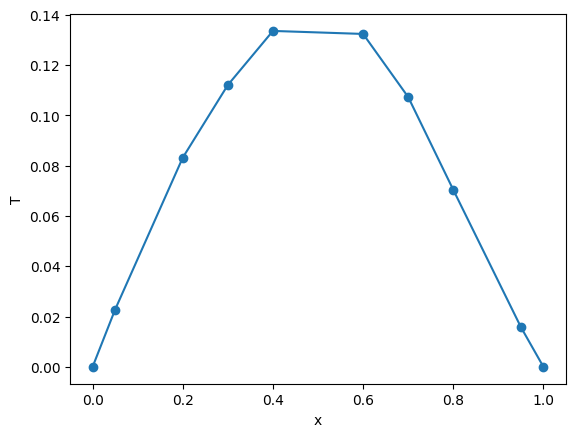

In [7]:
plt.plot(x_meas, T_meas, 'o-')
plt.xlabel('x')
plt.ylabel('T')

Yes, it is doable. The basic instinct here is to integrate this function using cubic spline.

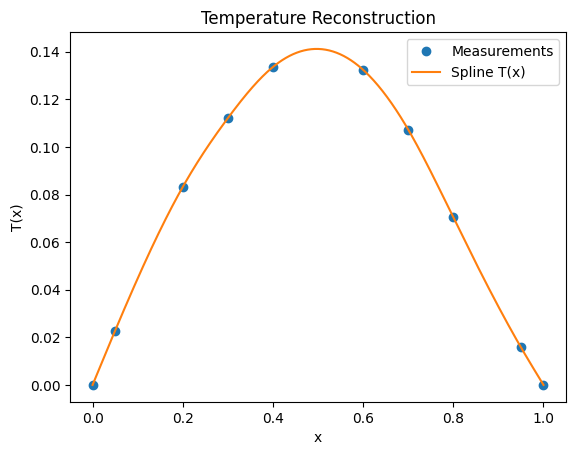

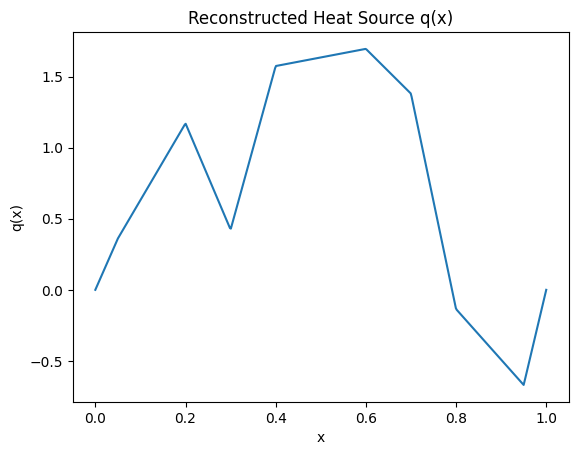

In [8]:
from scipy.interpolate import CubicSpline


# -----------------------------
# Natural cubic spline (smooth T'' reconstruction)
spline = CubicSpline(x_meas, T_meas, bc_type='natural')

# Fine grid for reconstruction
x_fine = np.linspace(0, 1, 500)
T_fine = spline(x_fine)

# -----------------------------
# Reconstruct q(x)
# From: T''(x) = -q(x)
# So: q(x) = -T''(x)
# -----------------------------
T_second_derivative = spline(x_fine, 2)
q_reconstructed = -T_second_derivative

# -----------------------------
# Plot results
# -----------------------------
plt.figure()
plt.plot(x_meas, T_meas, 'o', label="Measurements")
plt.plot(x_fine, T_fine, label="Spline T(x)")
plt.xlabel("x")
plt.ylabel("T(x)")
plt.legend()
plt.title("Temperature Reconstruction")
plt.show()

plt.figure()
plt.plot(x_fine, q_reconstructed)
plt.xlabel("x")
plt.ylabel("q(x)")
plt.title("Reconstructed Heat Source q(x)")
plt.show()

Since the anti derivative function gives almost accurate construction of the temperature function it can be assumed that the q(x) is also accurate here.

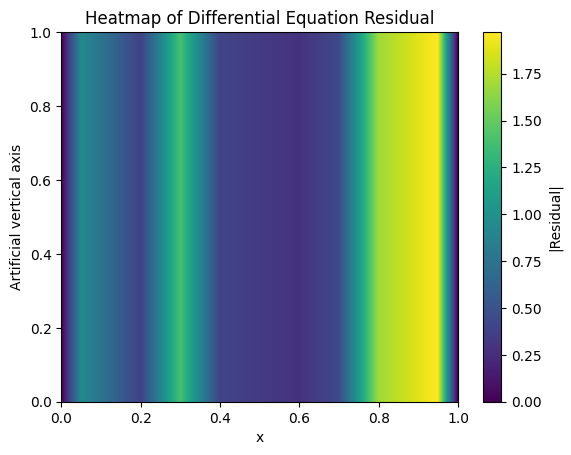

In [10]:
# -----------------------------------
# Compute residual of differential equation
# T''(x) = -q(x)
# Residual: R(x) = T''(x) + q(x)
# -----------------------------------

residual = T_second_derivative + q_reconstructed

# Absolute residual (more meaningful visually)
residual_abs = np.abs(residual)

# -----------------------------------
# Create 2D heatmap representation
# (Since problem is 1D, we tile values
# to visualize as heatmap)
# -----------------------------------

heatmap_data = np.tile(residual_abs, (50, 1))  # replicate in vertical direction

plt.figure()
plt.imshow(
    heatmap_data,
    extent=[0, 1, 0, 1],
    aspect='auto',
    origin='lower'
)
plt.colorbar(label="|Residual|")
plt.xlabel("x")
#plt.ylabel("Artificial vertical axis")
plt.title("Heatmap of Differential Equation Residual")
plt.show()

This figure shows the heatmap of residue created based on the differential equation formed by the approximated functions T(x) and q(x). Aside from some x points most of the residue error is well below 0.5

Max error in q reconstruction: 1.000000000000018
L2 error: 0.18133991838605515


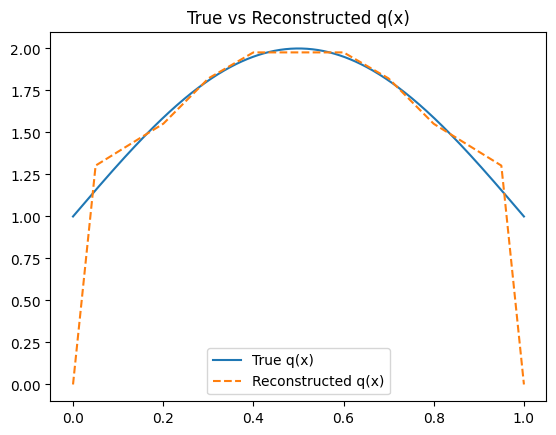

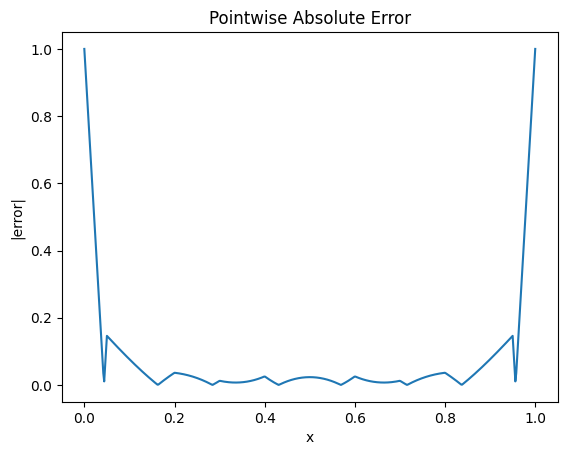

In [11]:
# ---------------------------------------------
# ERROR ANALYSIS FOR INVERSE RECONSTRUCTION
# ---------------------------------------------
# assume synthetic data q(x) = 1 + sin(pi*x)
# Strategy:
# 1. Define true q(x)
# 2. Solve forward problem for exact T(x)
# 3. Sample T at measurement points
# 4. Reconstruct q via spline differentiation
# 5. Compare reconstructed q to true q
# ---------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.linalg import solve_banded

# ---------------------------------------------
# TRUE SOURCE (choose smooth function)
# ---------------------------------------------
def q_true(x):
    return 1 + np.sin(np.pi * x)

# ---------------------------------------------
# FORWARD SOLVER (finite difference)
# Solves T'' = -q(x), T(0)=T(1)=0
# ---------------------------------------------
def solve_forward(N):
    h = 1.0 / N
    x = np.linspace(0, 1, N+1)

    q_vals = q_true(x[1:-1])

    # Tridiagonal matrix (banded form)
    ab = np.zeros((3, N-1))
    ab[0,1:] = -1 / h**2
    ab[1,:]  =  2 / h**2
    ab[2,:-1]= -1 / h**2

    b = q_vals

    T_interior = solve_banded((1,1), ab, b)

    T = np.zeros(N+1)
    T[1:-1] = T_interior

    return x, T

# ---------------------------------------------
# GENERATE SYNTHETIC DATA
# ---------------------------------------------
x_full, T_full = solve_forward(2000)   # fine solution

x_meas = np.array([
    0, 0.05, 0.20, 0.30, 0.40,
    0.60, 0.70, 0.80, 0.95, 1
])

T_meas = np.interp(x_meas, x_full, T_full)

# ---------------------------------------------
# RECONSTRUCTION VIA SPLINE
# ---------------------------------------------
spline = CubicSpline(x_meas, T_meas, bc_type='natural')

x_test = np.linspace(0, 1, 500)

q_reconstructed = -spline(x_test, 2)
q_exact_vals = q_true(x_test)

# ---------------------------------------------
# ERROR COMPUTATION
# ---------------------------------------------
error = np.max(np.abs(q_reconstructed - q_exact_vals))
l2_error = np.sqrt(np.mean((q_reconstructed - q_exact_vals)**2))

print("Max error in q reconstruction:", error)
print("L2 error:", l2_error)

# ---------------------------------------------
# PLOT ERROR
# ---------------------------------------------
plt.figure()
plt.plot(x_test, q_exact_vals, label="True q(x)")
plt.plot(x_test, q_reconstructed, '--', label="Reconstructed q(x)")
plt.legend()
plt.title("True vs Reconstructed q(x)")
plt.show()

plt.figure()
plt.plot(x_test, np.abs(q_reconstructed - q_exact_vals))
plt.title("Pointwise Absolute Error")
plt.xlabel("x")
plt.ylabel("|error|")
plt.show()

Since this is a poisson differential equation. We can use the analytical function
$$ q(x) = 1 + sin(\pi x) $$
to verify if the solution we have is correct or not.

We then plot it.

The code above calculates the maximum error and the average (L2) error, and then plots both the true and reconstructed functions, as well as the pointwise error. This shows how accurate the inverse reconstruction method is.

From the graph we can see that in the boundary the approximation falls off exactly as seen in the heatmap. the error near the heatmap was higher as well.

The second graph is similar to the differential equation residue heatmap. The error is lower in order and higher near and outside the intervals.